In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("./Datasets/slump_test.csv", sep=',')

In [5]:
df.drop('No', axis=1, inplace=True)

In [6]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [7]:
df.shape

(103, 10)

In [8]:
from mlr.MLR import MyLinearRegression as mlr

In [10]:
m = mlr()

In [12]:
predictors = list(df.columns[:7])
print(predictors)

['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.']


In [15]:
response = 'Compressive Strength (28-day)(Mpa)'

In [16]:
m.fit_dataframe(X=predictors, y=response, dataframe=df)

In [17]:
m.coef_

array([ 0.06141322, -0.02970752,  0.05052611, -0.23269505,  0.10314991,
       -0.05562163, -0.03908287])

In [19]:
m.intercept_

139.78149984916672

In [25]:
print("R-squared :", round(m.r_squared(),4))
print("Adjusted R-squared :", round(m.adj_r_squared(),4))
print("MSE :", round(m.mse(),4))

R-squared : 0.8968
Adjusted R-squared : 0.8892
MSE : 6.2765


In [26]:
m.print_metrics()

sse:     646.4840
sst:     6266.6636
mse:     6.2765
r^2:     0.8968
adj_r^2: 0.8892
AIC:     497.4937
BIC:     518.5716


$$SST = SSR + SSE$$<br/>
$$R^2 = \frac{SST}{SSR} = 1 - \frac{SSE}{SST}$$<br/>
$$Adj.R^2 = 1 - \frac{SSE/(n-1)}{SST/(n-p-1)}$$

In [32]:
n = df.shape[0]
p = df.shape[1] - 3

In [41]:
r2 = 1 - (m.sse()/m.sst())
adjr2 = 1 - (m.sse()/m.sst()) * ((n-1)/(n-p-1))

In [42]:
print("R^2 :", round(r2, 4))
print("Adjusted-R^2", round(adjr2, 4))

R^2 : 0.8968
Adjusted-R^2 0.8892


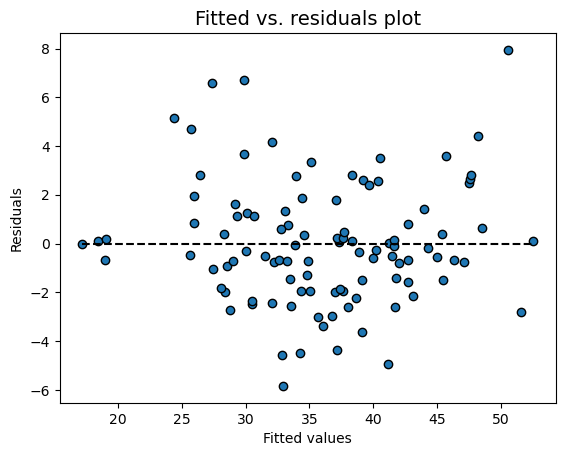

In [43]:
m.fitted_vs_residual()

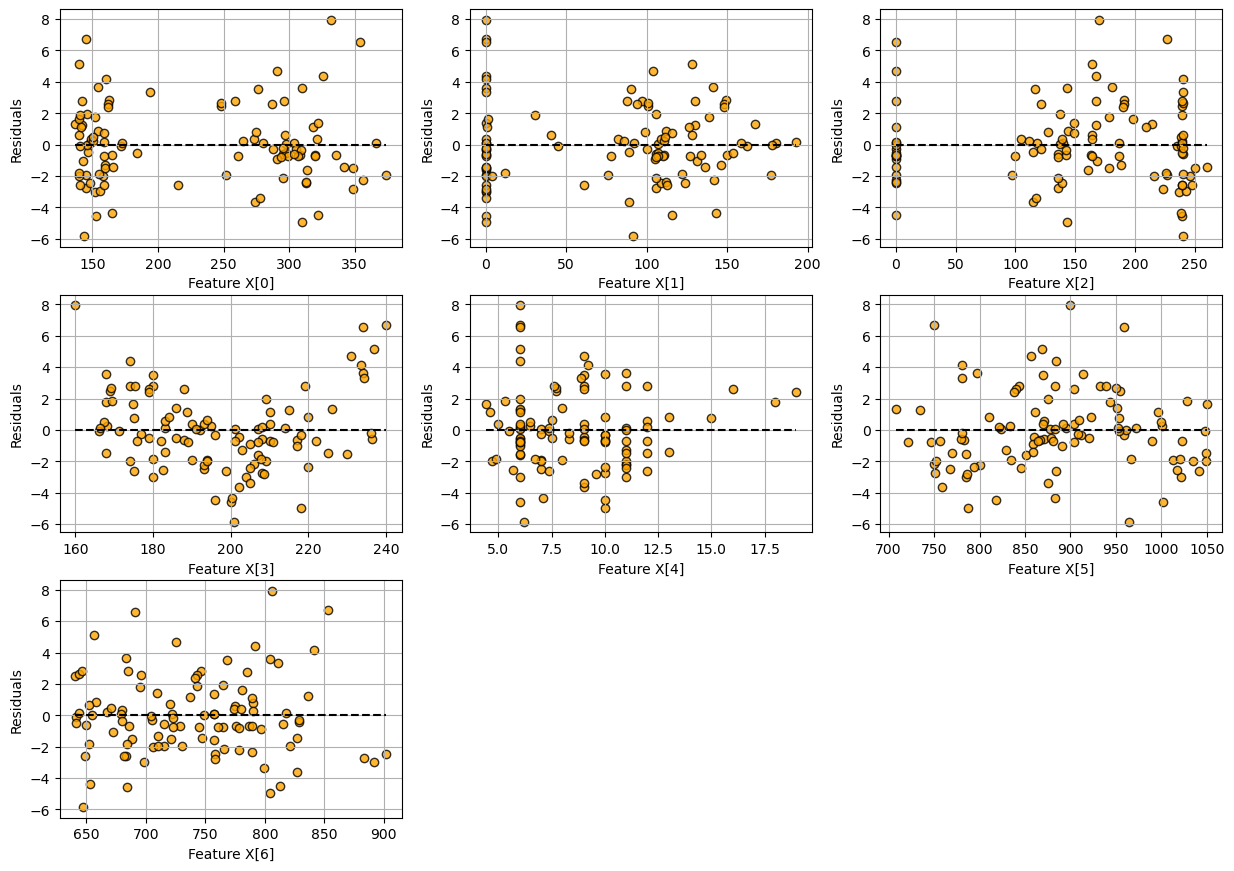

In [44]:
m.fitted_vs_features()

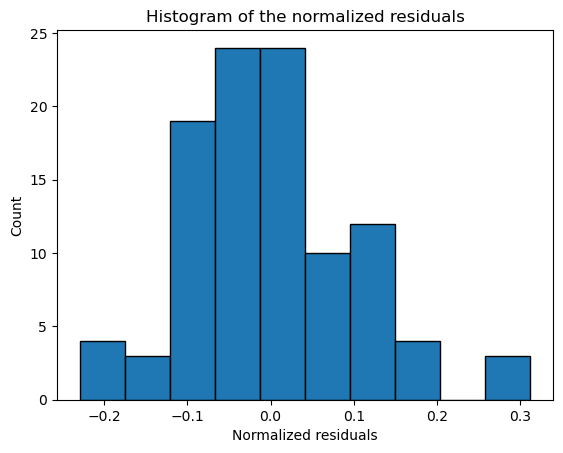

In [45]:
m.histogram_resid()

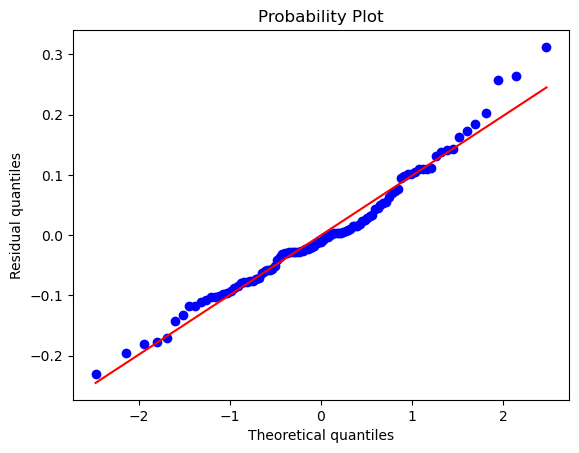

In [46]:
m.qqplot_resid()

In [47]:
m.ftest()

(117.98260528684811, 5.444633963386943e-44)

In [52]:
# 매우 중요
# 지금 하는 작업이 서로 상관관계가 높은 설명변수들은 제거하는 작업임.
# 제거 조건
# 설명변수들 p-value > 0.05 를 만족하면 제거함

In [51]:
for i in range(7):
    print(f"Predictor: {df.columns[i]}, Standard error: {m.std_err()[i+1]}, t-statistic: {m.tvalues()[i+1]}, p-value: {m.pvalues()[i+1]}")
    

Predictor: Cement, Standard error: 0.02282196349297466, t-statistic: 2.6909701980576406, p-value: 0.008418555802794051
Predictor: Slag, Standard error: 0.031762246099570735, t-statistic: -0.9353092790986882, p-value: 0.35200037909919346
Predictor: Fly ash, Standard error: 0.023157909546225524, t-statistic: 2.1818080877305457, p-value: 0.03159056533008434
Predictor: Water, Standard error: 0.07165979867888472, t-statistic: -3.2472188311451498, p-value: 0.0016109346748200578
Predictor: SP, Standard error: 0.13458581945999612, t-statistic: 0.7664248331315088, p-value: 0.445323878689036
Predictor: Coarse Aggr., Standard error: 0.027439241862754364, t-statistic: -2.027083481291075, p-value: 0.045455938103592206
Predictor: Fine Aggr., Standard error: 0.028823069774286787, t-statistic: -1.3559578766492217, p-value: 0.17832696427097303


In [53]:
m.conf_int()[1:]

# 신뢰구간 안에 0이 포함되어 있으면 제거해야함

array([[ 0.0161059 ,  0.10672055],
       [-0.09276355,  0.03334851],
       [ 0.00455185,  0.09650038],
       [-0.37495773, -0.09043236],
       [-0.16403672,  0.37033655],
       [-0.11009542, -0.00114785],
       [-0.0963039 ,  0.01813816]])

In [54]:
m.conf_int(alpha=0.01)[1:]

array([[ 0.00142397,  0.12140248],
       [-0.11319699,  0.05378194],
       [-0.0103462 ,  0.11139843],
       [-0.42105825, -0.04433184],
       [-0.2506191 ,  0.45691892],
       [-0.12774776,  0.01650449],
       [-0.11484649,  0.03668075]])

In [55]:
m2 = mlr()

In [56]:
predictors = ['Cement', 'Fly ash', 'Water', 'Coarse Aggr.']

In [57]:
m2.fit_dataframe(X=predictors, y=response, dataframe=df)

In [59]:
print("before model\n"+"-"*40)
m.print_metrics()

before model
----------------------------------------
sse:     646.4840
sst:     6266.6636
mse:     6.2765
r^2:     0.8968
adj_r^2: 0.8892
AIC:     497.4937
BIC:     518.5716


In [60]:
print("after model\n"+"-"*40)
m2.print_metrics()

after model
----------------------------------------
sse:     726.4008
sst:     6266.6636
mse:     7.0524
r^2:     0.8841
adj_r^2: 0.8794
AIC:     503.4988
BIC:     516.6724


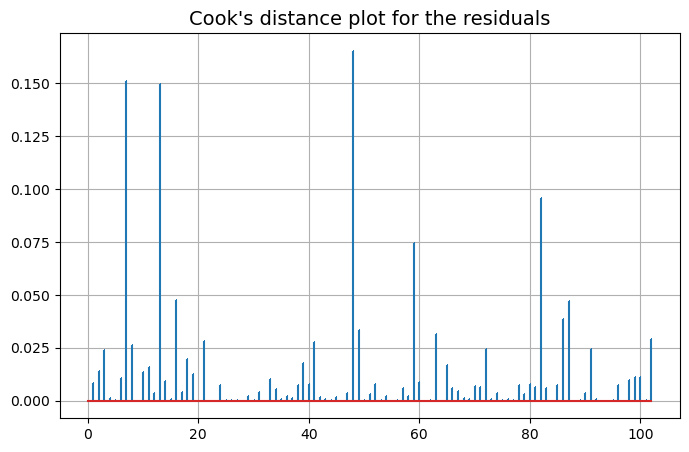

In [61]:
m.cook_distance()

* 설명변수의 증가는 모형의 결정계수 등을 증가시키기는 하지만 다중 공선성 문제 등을 일으키므로 결과적으로 추정의 신뢰성을 저하시킵니다.
> - 회귀 분석의 기본빵 : 모든 설명변수는 독립적이고 서로 영향 X
> - 다중 공선성 : 일부 설명변수가 다른 설명변수와 상관 계수가 높아서 데이터에 부정적인 영향 끼치는 것
> - 결국 둘 다 설명력이 약해짐.
* 변수가 많은 모델이라면(p가 큰) RSS는 작아지게 됩니다. 결국 AIC, BIC를 최소화 한다는 뜻은 우도(likelihood)를 가장 크게 하는 동시에 변수 갯수는 가장 적은 최적의 모델(parsimonious & explainable)
> - RSS(Root Sum Square) : 잔차 제곱합
*  Bias는 변수를 제거하면서 생기는 오류이고 Variance는 변수가 증가하면서 생기는 오류입니다
-----------------
* AIC : 데이터셋에 대한 통계모델에 대한 상대적인 품질을 평가하는 것.
> - $$ AIC = nln(\frac{SSE}{n}) + 2(p+1) $$
> - $$ AIC = -2ln(L) + 2k $$ 
* 2ln(L) : 모형의 적합도, k : 모형에 추정된 파라미터의 개수
> - L : Likelihood function
* BIC : AIC와 같이 모델 품질 평가하는 것.
> - $$ BIC = nln(\frac{SSE}{n}) + (p+1)ln(n) $$
> - AIC의 단점은 표본n 이 커질때 부정확해지는데 이걸 보완함.
--------------
* qqplot 에서 잔차가 45도 선에 너무 많이 벗어나면 정규성 가정 위배됨.
-------------
* cook`s distance : 쿡의 거리, 각 관측값들이 이상치인지 수치화 시키는 지표
> - 수치가 높을 수록 이상치일 확률이 높음. 따로 관리해줘야함.
> - x축 index, y축 쿡의거리 값